## **Handling Univariate feature Missing Values Using Random Sample Imputation(For Numerical Value)**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
data.sample(5)

,Survived,Age,Fare
143,0,19.0,6.75
376,1,22.0,7.25
597,0,49.0,0.00
785,0,25.0,7.25
837,0,NaN,8.05


In [4]:
data.isnull().mean()*100 #Checking the % of Missing Values

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 3.  , 34.  , 36.  , 23.  , 24.  , 47.  , 39.  , 21.  , 46.  ,
       58.  , 28.  , 21.  , 12.  , 56.  , 19.  , 22.  , 56.  , 30.  ,
       18.  , 18.  , 29.  , 20.  ,  8.  , 36.  , 30.  , 38.  , 66.  ,
       32.  , 28.  , 18.  , 43.  , 26.  , 29.  , 34.  , 29.  , 25.  ,
       21.  , 35.  , 31.  , 28.  , 32.  , 25.  , 25.  , 26.  , 24.  ,
       24.  , 21.  ,  5.  , 20.  , 42.  , 33.  , 33.  , 41.  , 50.  ,
       50.  , 25.  , 39.  , 29.  , 40.  , 48.  , 23.  , 19.  , 27.  ,
       39.  , 33.  , 26.  , 18.  , 24.  , 40.  , 61.  , 29.  , 29.  ,
       47.  , 23.  , 27.  , 19.  , 35.  ,  3.  , 26.  , 34.  , 36.  ,
       16.  , 27.  , 53.  , 24.  , 33.  , 27.  , 20.  , 24.  , 19.  ,
       41.  , 37.  , 25.  , 16.  , 28.  , 54.  , 60.  , 30.  , 39.  ,
       18.  , 28.5 , 28.  ,  4.  , 21.  , 47.  , 35.  , 14.  ,  2.  ,
        4.  , 14.  , 29.  , 21.  , 24.  , 41.  , 30.  , 42.  , 20.  ,
       30.  , 52.  ,  2.  , 26.  , 25.  , 16.  , 22.  , 29.  , 29.  ,
       42.  , 16.  ,

In [13]:
X_train['Age'].isnull().sum()

148

In [14]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,25.0
493,71.0,49.5042,71.0
527,NaN,221.7792,36.0


#### **Plotting the Graph**

<ipython-input-15-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-15-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


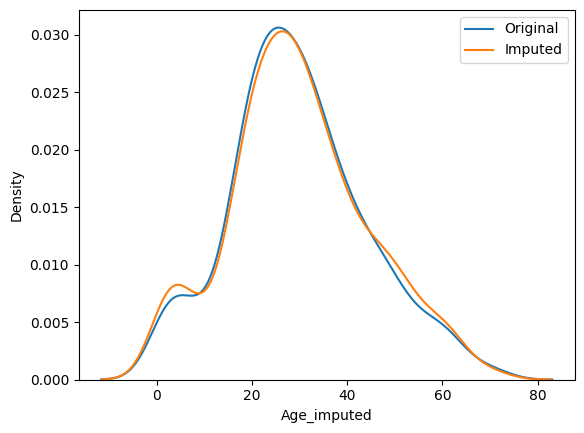

In [15]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

#### **Comparing the Variance & Covariance**

In [16]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  215.403699762757


In [17]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,56.380666
Age,71.512440,204.349513,204.349513
Age_imputed,56.380666,204.349513,215.403700


<Axes: >

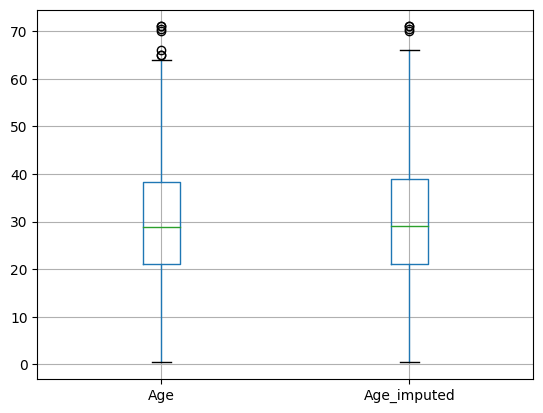

In [20]:
X_train[['Age', 'Age_imputed']].boxplot() #No Outliers are Affected or Created

In [22]:
observation = {'Fare': 71.2833}

In [23]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))